#  Predict the occupancy using classification tecniques
##### Objective:
Build a predictive model using machine learning to predict whether a room is occupied or not

### Approach: 
  Here the note book contains 5 sections
  
  1) Exploratory Data analysis
  
  2) Feature Engineering: Extract new features from date column
  
  3) Applying Machine laerning models
  
  4) Neural Networks to classify Occupied and Unoccupied
    
  5) Conclusion

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support,accuracy_score,precision_score)

from sklearn.model_selection import cross_validate
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OneHotEncoder
np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

In [2]:
datatest=pd.read_csv('datatest.txt')

In [3]:
datatest.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [4]:
datatest.shape

(2665, 7)

In [5]:
datatraining=pd.read_csv('datatraining.txt')

In [6]:
datatraining.shape

(8143, 7)

In [7]:
datatraining.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [8]:
datatest2=pd.read_csv('datatest2.txt')

In [9]:
datatest2.shape

(9752, 7)

In [10]:
datatest2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


- datatest,datatraining and datatest2 can be merged to make a single dataset

### Merging all three datasets

In [11]:
dfappend=datatest.append([datatraining,datatest2],ignore_index=True)

In [12]:
dfappend.sample(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
17775,2015-02-16 10:54:59,21.500000,27.840000,454.0,1019.5,0.004415,1
5971,2015-02-07 00:56:59,20.033333,18.633333,0.0,438.0,0.002692,0
11804,2015-02-12 07:24:00,20.500000,22.445000,0.0,734.5,0.003341,0
18114,2015-02-16 16:34:00,21.790000,29.790000,429.0,934.5,0.004812,1
290,2015-02-02 19:08:59,21.500000,24.100000,0.0,617.0,0.003818,0


In [13]:
dfappend.shape

(20560, 7)

### Checking the basic info about the data

In [14]:
dfappend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [15]:
### Covert date column to datetime format
dfappend['date'] = pd.to_datetime(dfappend['date'])

In [16]:
df=dfappend.copy()

### Checking the null values in the dataset

In [17]:
df.isna().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

- No null values in the dataset

### Examine the class label imbalance

In [18]:
df['Occupancy'].value_counts(normalize=True)*100

0    76.896887
1    23.103113
Name: Occupancy, dtype: float64

 - Occupied class 1 contains 23.1% of the total data.This shows that data is imbalanced.

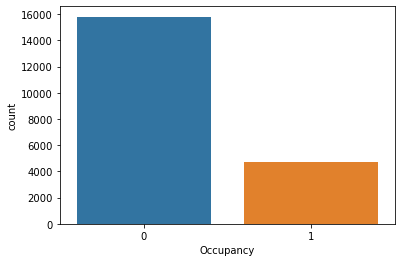

In [19]:
### visualisation of failure and normal case
ax = sns.countplot(x="Occupancy", data=df)

### Basic statistics summary

In [20]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


### Univariate analysis

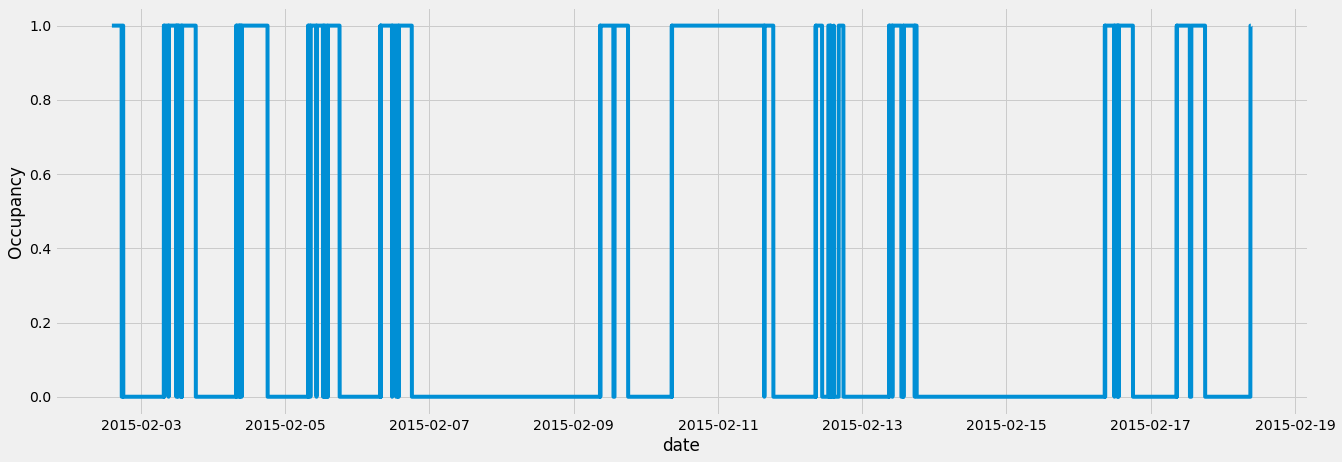

In [21]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,7))
ax = sns.lineplot(x="date", y="Occupancy", markers=True, dashes=False, data=df)

<B>Observation:</b><BR>
- It seems there is a seasonility effect on the Occupancy.
- Weekend and working hours impacts the Occupancy

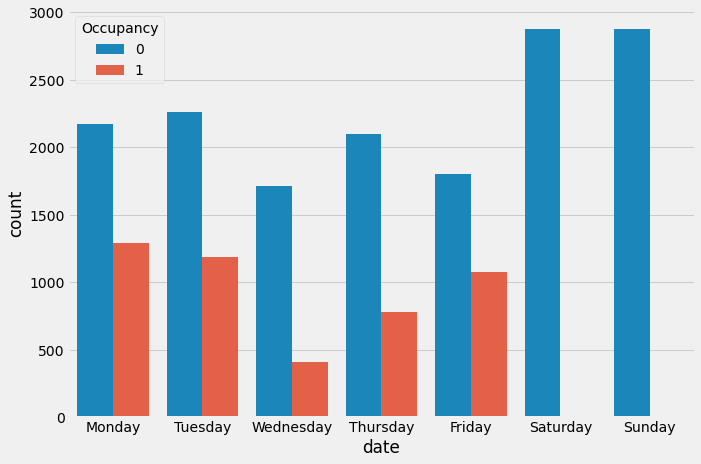

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
ax = sns.countplot(x=df['date'].dt.day_name(), hue="Occupancy", data=df)


<B>Observation:</b><BR>
- Saturday and Sunday occupancy is zero. Hence a new column 'weekend' is created
- Weekend= 1 means that day is saturday or sunday.Weekend= 0 means Working day. 
- Highest occupancy is on Monday followed by Friday
- Lowest Occupancy is on Wednessday    

In [23]:
df['weekend']=[1 if ((x =='Saturday') | (x=='Sunday')) else 0 for x in df['date'].dt.day_name()]

In [24]:
weekday_data=df[df['weekend']==0]

[Text(0, 0.5, 'Occupancy Count'), Text(0.5, 0, 'Hour in the day')]

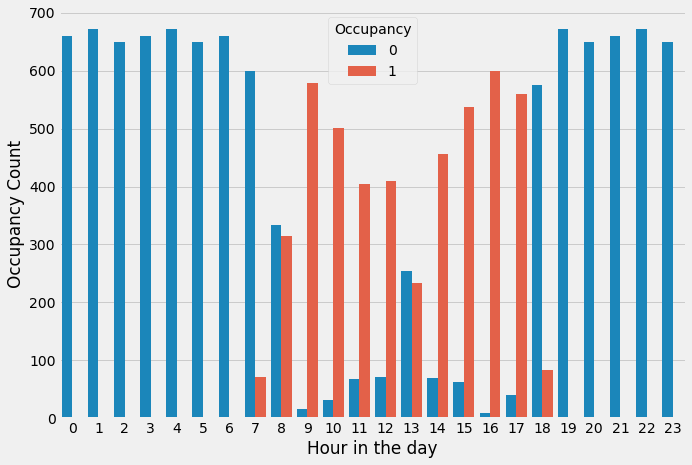

In [25]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
hour=weekday_data['date'].dt.hour
ax = sns.countplot(x=hour, hue="Occupancy", data=weekday_data)
ax.set(ylabel='Occupancy Count', xlabel='Hour in the day')

<B>Observation:</b><BR>
- From the above count plot we can say that Occupancy is 1 in between 7 to 18 hours only.Hence we can create new column called hour_of_day.<BR>
- 07:00 - 18:00  working_hour labeled as 1<BR>
- Rest of the day non working hour labeled as 0<BR>

In [26]:
df['hour_of_day'] = [1 if (x >= 7 and x <= 17) else 0 for x in df['date'].dt.hour]

<AxesSubplot:xlabel='HumidityRatio', ylabel='Density'>

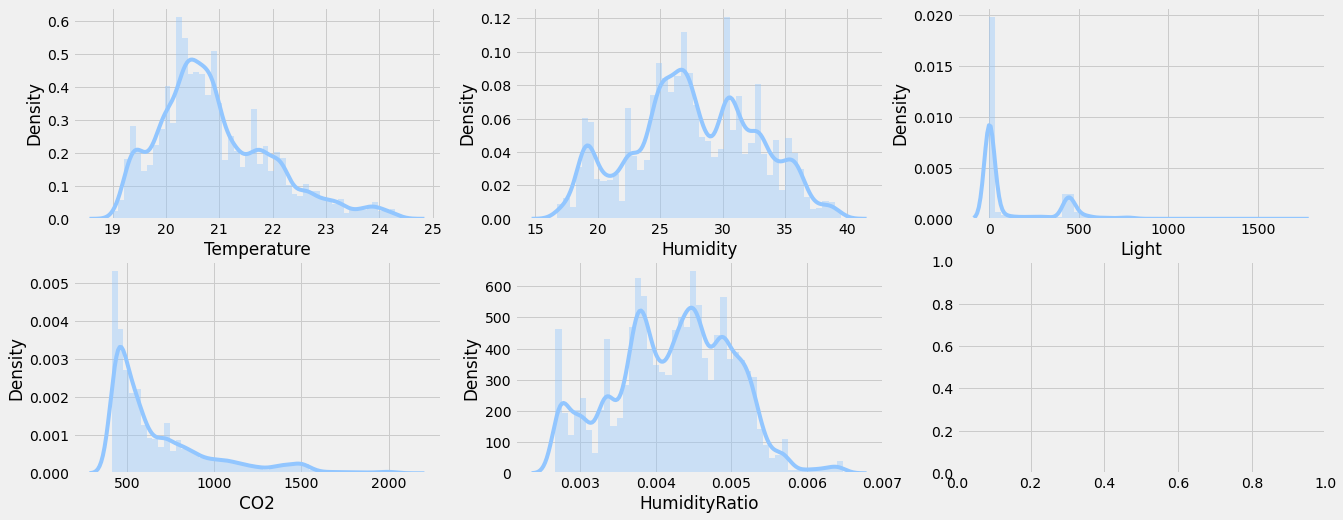

In [27]:
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(2,3,figsize=(20,8)) 
sns.distplot(df['Temperature'],ax=ax[0,0]) 
sns.distplot(df['Humidity'],ax=ax[0,1]) 
sns.distplot(df['Light'],ax=ax[0,2])
sns.distplot(df['CO2'],ax=ax[1,0]) 
sns.distplot(df['HumidityRatio'],ax=ax[1,1])

<B>Observation:</b><BR>
- ``CO2 and Light`` are right skewed
- ``Temerature,Humidity and Humidity`` are apprximately normally distributed
- There are two distinct gausinas in the ``Light`` feature

### Bi Variate analysis

<AxesSubplot:xlabel='Occupancy', ylabel='HumidityRatio'>

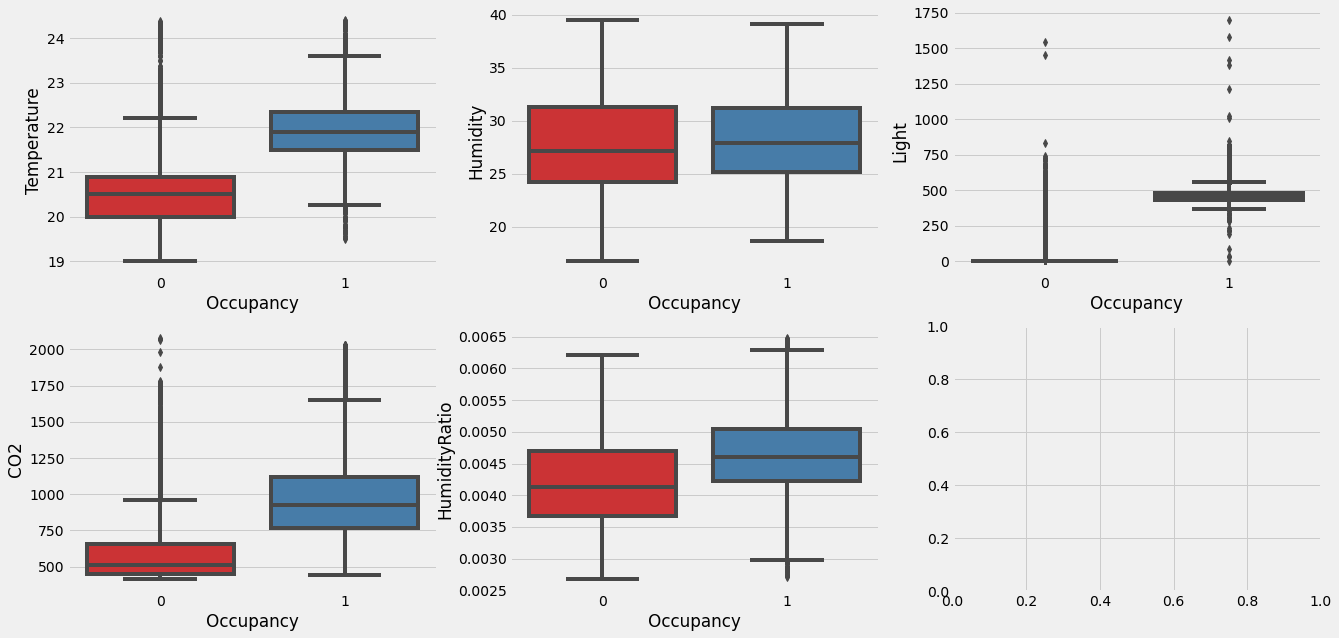

In [28]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.boxplot(x='Occupancy',y='Temperature',data=df,palette="Set1",ax=ax[0,0])
sns.boxplot(x='Occupancy',y='Humidity',data=df,palette="Set1",ax=ax[0,1])
sns.boxplot(x='Occupancy',y='Light',data=df,palette="Set1",ax=ax[0,2])
sns.boxplot(x='Occupancy',y='CO2',data=df,palette="Set1",ax=ax[1,0])
sns.boxplot(x='Occupancy',y='HumidityRatio',data=df,palette="Set1",ax=ax[1,1])

<B>Observation:</b><BR>
- We can observe that Occupancy class=1 when the temperature,CO2,Light in the room are high
- We cannot distinguih the occupancy based on the humidity.It means humidity have least impact on predicting the occupancy class

### Pair plot

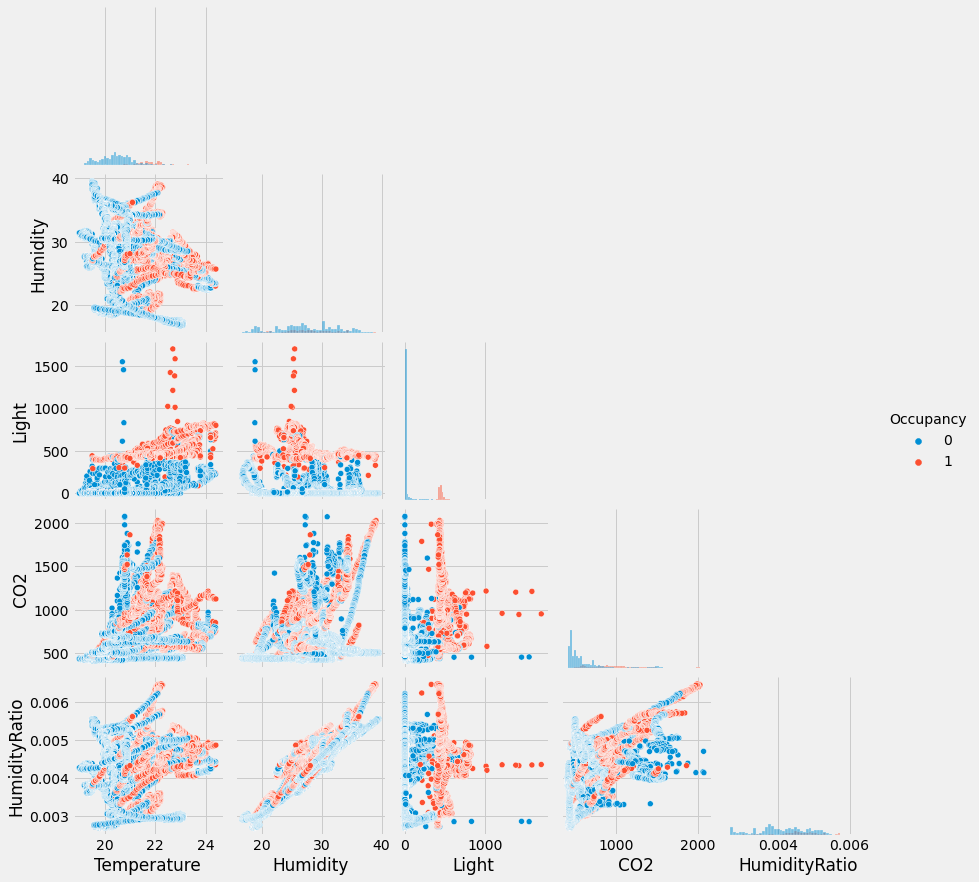

In [29]:
df_pairplot=df.drop(['date','weekend','hour_of_day'],axis=1)
sns.pairplot(df_pairplot,diag_kind='hist',hue='Occupancy',corner=True)

- ``Humidity`` and ``HumidityRatio`` are highly correlated.
- From the ``HumidityRatio`` and ``Humidity`` histograms we can observe that Occupancy class 0 and 1 are overlapped.
- From the `Light` Histogram we can observe that there are two seperate groups for Occupancy
- There is a positive correlation between `HumidityRatio and CO2


In [30]:
from yellowbrick.features import ParallelCoordinates
#features = feature_names
classes = ['unoccupied', 'occupied']
# Instantiate the visualizer
visualizer = visualizer = ParallelCoordinates(
    classes=classes, features=['Temperature', 'Humidity', 'Light', 'CO2','HumidityRatio'],
    normalize='standard', sample=0.1, size = (800,300))
x=df[['Temperature','Humidity','Light','CO2','HumidityRatio']]
y=df['Occupancy']
visualizer.fit(x, y)     
visualizer.transform(x)   
visualizer.poof()

ModuleNotFoundError: No module named 'yellowbrick'

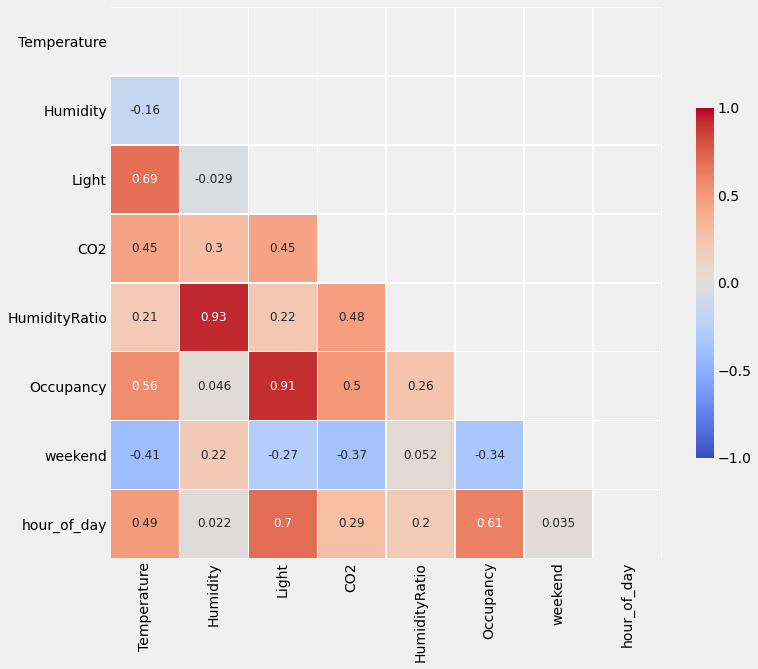

In [31]:
corr_matrix=df.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

<B>Observation correlation analysis:</b><BR>
- `HumidityRatio` and `CO2` are highly correlated with value 0.93
- `Occupancy and Light` are highly correlated with value 0.91
- `hour_of_day and Light` are highly correlated with value 0.7
- `hour_of_day and Humidity` are least correlated with value 0.022   

## Summary Exploratory data analysis:
- There are no null values,duplicates in the dataset

- ``Occupancy`` class 1 contains 23.1% of the total data.This shows that data is imbalanced.
- Over all data is very clean
- Two new features ``weekend`` and ``hour_of_day`` are extracted from ``date`` column 

<B>Univariate Summary:</b><BR>

- It seems there is a seasonility effect on the Occupancy.Weekend and working hours impacts the Occupancy

- Saturday and Sunday occupancy is zero. Hence a new column ``weekend`` is created

- Highest ``Occupancy`` is on Monday followed by Friday and Lowest ``Occupancy`` is on Wednessday

- ``Occupancy`` is 1 in between 7 to 18 hours only.Hence we can create new column called ``hour_of_day``
- ``CO2 and Light`` are right skewed
- ``Temerature,Humidity and Humidity`` are apprximately normally distributed
- There are two distinct gausinas in the ``Light`` feature

<B>Bivariate Summary:</b><BR>
    The following are observed using boxplots,pair plot and correlation plot
- We can observe that ``Occupancy`` class=1 when the ``temperature,CO2,Light`` in the room are high
- We cannot distinguih the ``Occupancy`` based on the ``Humidity``.It means ``Humidity`` have least impact on predicting the ``Occupancy`` class
- ``Humidity`` and ``HumidityRatio`` are highly correlated.
- From the ``HumidityRatio`` and ``Humidity`` histograms we can observe that Occupancy class 0 and 1 are overlapped.
- From the `Light` Histogram we can observe that there are two seperate groups for Occupancy
- There is a positive correlation between `HumidityRatio and CO2`
- `HumidityRatio` and `CO2` are highly correlated with value 0.93
- `Occupancy and Light` are highly correlated with value 0.91
- `hour_of_day and Light` are highly correlated with value 0.7
- `hour_of_day and Humidity` are least correlated with value 0.022  
    

### Train test split

In [32]:
df1=df.copy()

In [33]:
X=df1.drop(['Occupancy','date'],axis=1)

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    20560 non-null  float64
 1   Humidity       20560 non-null  float64
 2   Light          20560 non-null  float64
 3   CO2            20560 non-null  float64
 4   HumidityRatio  20560 non-null  float64
 5   weekend        20560 non-null  int64  
 6   hour_of_day    20560 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.1 MB


In [35]:
y=df1['Occupancy']

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=1000, random_state=42,shuffle=False)

In [37]:
X_test.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,weekend,hour_of_day
19560,22.125000,34.297500,429.0,1453.00,0.005662,0,1
19561,22.125000,34.370000,429.0,1458.75,0.005674,0,1
19562,22.100000,34.395000,429.0,1456.75,0.005669,0,1
19563,22.166667,34.296667,429.0,1458.00,0.005676,0,1
19564,22.150000,34.425000,429.0,1466.00,0.005692,0,1


In [38]:
numerical_ix = X.select_dtypes(include=['float64']).columns
categorical_ix=X.select_dtypes(include=['int64']).columns

In [39]:
categorical_ix

Index(['weekend', 'hour_of_day'], dtype='object')

In [40]:
numerical_ix

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')

In [41]:
#from sklearn.compose import ColumnTransformer
#transformer = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_ix)], remainder='passthrough')

In [42]:
from sklearn.compose import ColumnTransformer
t = [('cat', OneHotEncoder(), categorical_ix), ('num', StandardScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)

In [43]:
col_transform

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 Index(['weekend', 'hour_of_day'], dtype='object')),
                                ('num', StandardScaler(),
                                 Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object'))])

In [44]:
#print('X_train Shape:', X_train.shape)
#print('X_test Shape:', X_test.shape)
#print('y_train Shape:', y_train.shape)
#print('y_test Shape:', y_test.shape)

## Feature Engineering

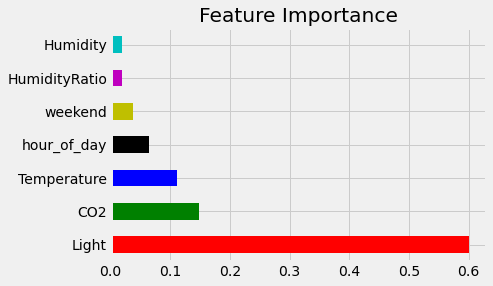

In [45]:
clf = RandomForestClassifier(n_estimators=50, max_features='auto')
clf= clf.fit(X_train,y_train)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
color = list('rgbkymc')
feat_importances.nlargest(10).plot(kind='barh',color=color)
plt.title('Feature Importance')
plt.show()

### Feature selection

In [46]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import StratifiedKFold

#from yellowbrick.model_selection import RFECV
#from yellowbrick.datasets import load_credit


#cv = StratifiedKFold(5)
#visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

#visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
#visualizer.show()           # Finalize and render the figure

<B>Observation Feaure Engineering:</b><BR>
- `Light and CO2` are most important features to predict
- `Humidity and HumidityRatio` are least important features
    As we have total only 7 features, I am using all the features for modelling

## Model Building

#### Model selection
Following algorithms are selected for model building

- Logistic regression

- XGBClassifier

- LGBMClassifier

- Gradient boosting classifier

- KNeighborsClassifier

- Support vector machines

- RandomForestClassifier

In [47]:
log=LogisticRegression(max_iter=1000,random_state=42)
k=KNeighborsClassifier()
gbc =GradientBoostingClassifier(random_state=42)
svc = SVC(random_state=42)
rfc = RandomForestClassifier(random_state=42,n_estimators=10)
xg_clf = XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 50,random_state=42)
lgb = LGBMClassifier(random_state=42)
algorithms=[k,log,gbc,rfc,svc,xg_clf,lgb]
names=['KNeighborsClassifier','Logistic','GradientBoost','RandomForest','SVC','xgboost','LGB']

In [48]:
 #Library for handling imnalanced class

#rus = SMOTETomek(random_state=42)

In [49]:
def crossvalidate(clf, X, y):
    
    scores={'ACCURACY':'accuracy', 
           'RECALL':'recall',
           'PRECISION':'precision',
           'F1':'f1'}
    
    model = Pipeline([('num_scaler', col_transform),
        ('sampling', SMOTETomek()),
        ('classification', clf)])
    
    skf = StratifiedKFold(n_splits=5,random_state=None,shuffle=True)
    crossvalidate = cross_validate(model, X, y, scoring= scores,cv=skf)
    score=pd.DataFrame(crossvalidate).mean()
    return score

In [50]:
clf=LogisticRegression(max_iter=1000,random_state=42)
crossvalidate(clf, X_train, y_train)

fit_time          0.187892
score_time        0.007788
test_ACCURACY     0.989622
test_RECALL       0.997207
test_PRECISION    0.960749
test_F1           0.978618
dtype: float64

In [51]:
def cross_vali_fit_pred(X_train, y_train, algorithms = algorithms, names = names):
    metrics=pd.DataFrame()
    for i in range(len(algorithms)):        
        scr=crossvalidate(algorithms[i],X_train,y_train)
        metrics=metrics.append(scr[2:],ignore_index=True)
    metrics.index=names
    metrics.columns=['ACCURACY','F1','PRECISION','RECALL']
    return metrics.sort_values(by=['F1'],ascending=False)

#### Model results summary.
As the data is imbalanced F1score,recall and precission is considered as metrics

In [52]:
cross_vali_fit_pred(X_train, y_train, algorithms = algorithms, names = names)

[01:34:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:34:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:34:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:34:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

,ACCURACY,F1,PRECISION,RECALL
LGB,0.993252,0.985935,0.978018,0.993985
KNeighborsClassifier,0.992791,0.984999,0.975973,0.994200
RandomForest,0.992331,0.984015,0.976329,0.991837
SVC,0.989980,0.979352,0.961135,0.998281
Logistic,0.989622,0.978611,0.960712,0.997207
GradientBoost,0.989366,0.978028,0.962599,0.993985
xgboost,0.982720,0.964848,0.935687,0.995918


###### observation

LGB and Random forest are giving highest f1sore,Logistic regression and xgboost are giving less f1score

In [53]:
from sklearn.model_selection import RandomizedSearchCV
def Randomsearch(clf, X_train,y_train,X_test,y_test,params):
    
    model = Pipeline([('num_scaler', col_transform),
    ('sampling', SMOTETomek()),
    ('classification', clf)])
    
    RCV=RandomizedSearchCV(model, params, cv=5,scoring='f1',n_iter=20,random_state=42)
    RCV.fit(X_train, y_train)
    y_pred=RCV.predict(X_test)
    f1score=f1_score(y_test, y_pred, average='macro')
    return RCV,y_pred,f1score

In [54]:
params=[{'classification__n_neighbors': (10, 15, 25)},
 {
    'classification__n_estimators': [400, 700, 1000],
    'classification__colsample_bytree': [0.7, 0.8],
    'classification__max_depth': [15,20,25],
    'classification__num_leaves': [50, 100, 200],
    'classification__reg_alpha': [1.1, 1.2, 1.3],
    'classification__reg_lambda': [1.1, 1.2, 1.3],
    'classification__min_split_gain': [0.3, 0.4],
    'classification__subsample': [0.7, 0.8, 0.9],
    'classification__subsample_freq': [20]
}]

In [55]:
classifiers=[('KNearestNeighbors',
              KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                                   metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                                   weights='uniform')),
             ('LGB Classifier',
              LGBMClassifier(random_state=42))]

In [56]:
for param, classifier in zip(params, classifiers):
    
    print("Working on {}...".format(classifier[0]))
    
    clf,y_pred,f1score = Randomsearch(classifier[1], X_train, y_train,X_test,y_test, param) 
    
    print("Best parameter for {} is {}".format(classifier[0], clf.best_params_))
    
    #
    print("Best `F1` for {} is {}".format(classifier[0], f1score))
    
    print('-'*50)
    
    print('\n')

Working on KNearestNeighbors...
Best parameter for KNearestNeighbors is {'classification__n_neighbors': 25}
Best `F1` for KNearestNeighbors is 1.0
--------------------------------------------------


Working on LGB Classifier...
Best parameter for LGB Classifier is {'classification__subsample_freq': 20, 'classification__subsample': 0.9, 'classification__reg_lambda': 1.2, 'classification__reg_alpha': 1.3, 'classification__num_leaves': 200, 'classification__n_estimators': 700, 'classification__min_split_gain': 0.3, 'classification__max_depth': 25, 'classification__colsample_bytree': 0.7}
Best `F1` for LGB Classifier is 0.9971058031540957
--------------------------------------------------




#### Final Model selection


In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
lgb_model = LGBMClassifier(subsample_freq= 20, subsample= 0.7, reg_lambda= 1,reg_alpha = 1.3, num_leaves = 50, n_estimators= 1000, min_split_gain= 0.4,
                           max_depth= 25, colsample_bytree= 0.8,random_state=42)
model = Pipeline([('num_scaler', col_transform),
('sampling', SMOTETomek()),
('classification', lgb_model)])
model.fit(X_train,y_train)
lgb_y_pred=model.predict(X_test)

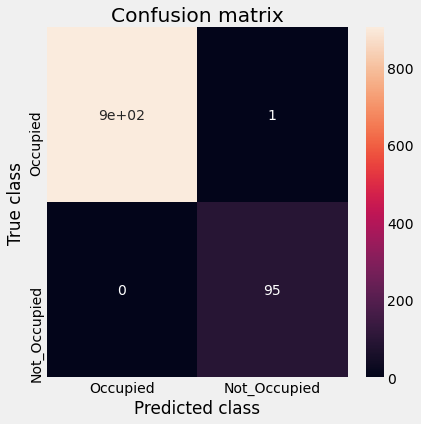

In [59]:
cm = confusion_matrix(y_test, lgb_y_pred)
#normed_c = (cm.T / cm.astype(np.float).sum(axis=1)).T
plt.figure(figsize=(6, 6))
LABELS = ["Occupied", "Not_Occupied"]
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True);
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()